In [1]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray(img, dtype="float32") / 65535.0
    return data

def display_image(img):
    return Image.fromarray(np.uint8(np.clip(255 * img, 0, 255)))

def save_image( npdata, outfilename ) :
    #img = Image.fromarray( np.asarray( np.clip(npdata*65535,0,65535), dtype="uint16"), "L" )
    img = Image.fromarray(np.uint8(np.clip(255 * npdata, 0, 255)))
    img.save( outfilename )

In [2]:
z = 20
lower_percentile = 1
upper_percentile = 99

In [3]:
# Create a stack of images [z, x, y]
stack = np.array([
    load_image(r"../Sem2_Z_16a/Sem2_Z_16a_%04d.tif" % layer)
    #for layer in range(0, 1364)])
    for layer in range(100, 200)])

# Scale and clip out-of-bounds
lower = np.percentile(stack, lower_percentile)
upper = np.percentile(stack, upper_percentile)
stack = np.clip((stack - lower) / (upper - lower), 0.0, 1.0)

In [4]:
# Calculate the 3D gradient
grad = np.gradient(stack)
gradimg = np.dstack((grad[0][z], grad[1][z], grad[2][z]))

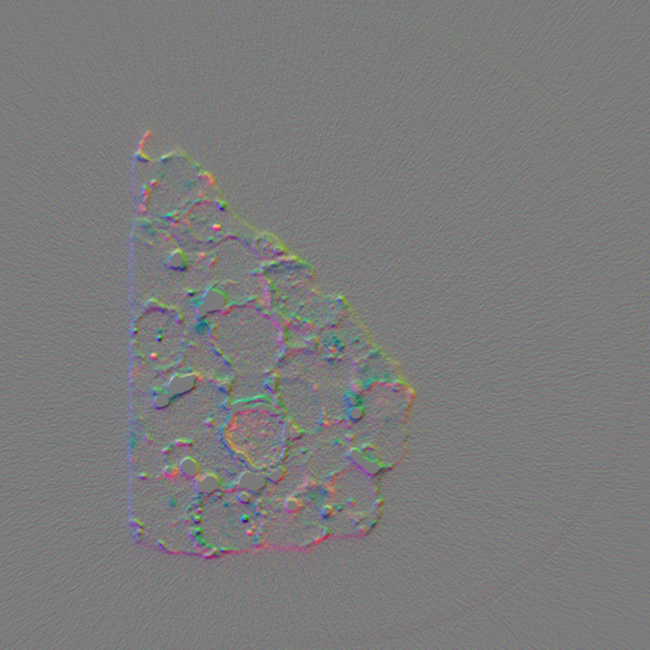

In [6]:
#img = load_image(r"../Sem2_Z_16a/Sem2_Z_16a_0200.tif")
gi_min = np.min(gradimg)
gi_max = np.max(gradimg)

display_image((gradimg - gi_min) / (gi_max - gi_min))

In [ ]:
g_min = np.min(grad)
g_max = np.max(grad)
g = (grad - g_min) / (g_max - g_min)
for z in xrange(len(grad[0])):
    gradimg = np.dstack((g[0][z], g[1][z], g[2][z]))
    save_image(gradimg, "../Sem2_Z_16a-Gradient/Sem2_Z_16a_%04d.tif" % z)

In [7]:
import scipy